# Background Estimate
Last time, we have estimated pi0 background. However, probably, we have overestimated the background. At high $Q^{2}$ bin, proton always goes to forward detector, and photon goes to large polar angle, i.e. forward detector, not forward tagger (http://localhost:8888/notebooks/simComparison.ipynb). So, we are more interested in forward detector data, which must be DVCS. Of course, we expect significant background, it is not reasonable to think that all data consists of DVpi0P background. To correctly estimate, we try following things.

## 1. Loading Data
We start with loading related data as usual.

In [1]:
from utils.epg import *

In [2]:
#DVCS from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/dvcs_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0()
dvcs = epg.getDVCS(sub2g=False)
dvcsExpInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [3]:
# #DVCS from experiment, inbending
# fname = "~/Dropbox (MIT)/data/raw/5038.root"
# epg = epgFromROOT(fname)
# dvpi0 = epg.getDVpi0()
# dvcs = epg.getDVCS(sub2g=True)
# run5038 = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [4]:
#pi0 from experiment, inbending
fname = "~/Dropbox (MIT)/data/data/pi0_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0()
dvcs = epg.getDVCS(sub2g=False)
pi0ExpInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg}

In [5]:
# #dvcs from simulation, vz correct, vxvy (0.05, 0.1), gen
# fname = "~/Dropbox (MIT)/data/MC/nonradVxyzCorrInbMC.root"
# epg = epgFromROOT(fname, mc=True)
# # dvpi0 = epg.getDVpi0()
# dvcs = epg.getDVCS()
# dvcsMCVxyzCorrInb = {"fname_gen":fname, "epg_gen":epg, "dvcs_gen": dvcs, "df_epg_gen": epg.df_epg}

In [84]:
#dvcs from simulation, vz correct, vxvy (0.05, 0.1), rec
fname = "~/Dropbox (MIT)/data/MC/nonradVxyzCorrInbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
dvcsMCVxyzCorrInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC": epg.df_MC}

In [85]:
# #dvcs from simulation, vz correct, vxvy (0.05, 0.1), rec
# fname = "~/Dropbox (MIT)/data/MC/nonradVxyzCorrInbREC.root"
# epg = epgFromROOT(fname, rec=True)
# dvpi0 = epg.getDVpi0(correction=False)
# dvcs = epg.getDVCS(correction=False, sub2g=True)
# dvcsMCVxyzCorrInbNoCorr = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC": epg.df_MC}

In [86]:
# #pi0 from Andrey, inb, rec
# fname = "~/Dropbox (MIT)/data/MC/dnp/pi0DNPInbMC.root"
# epg = epgFromROOT(fname, mc=True)
# dvpi0 = epg.getDVpi0()
# dvcs = epg.getDVCS()
# pi0MCdnpInb = {"fname_gen":fname, "epg_gen": epg, "dvpi0_gen": dvpi0, "dvcs_gen":dvcs, "df_epg_gen": epg.df_epg, "df_epgg_gen": epg.df_epgg}

In [163]:
#pi0 from Andrey, inb, rec
fname = "~/Dropbox (MIT)/data/MC/dnp/pi0DNPInbREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=False)
dvcs = epg.getDVCS(correction=False, sub2g=False)
pi0MCdnpInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_ep": epg.df_ep, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC":epg.df_MC}

In [88]:
# #pi0 from Andrey, inb, rec
# fname = "~/Dropbox (MIT)/data/MC/pi0_BobbyMC.root"
# epg = epgFromROOT(fname, mc=True)
# dvpi0 = epg.getDVpi0()
# dvcs = epg.getDVCS()
# pi0BobbyInb = {"fname_gen":fname, "epg_gen": epg, "dvpi0_gen": dvpi0, "dvcs_gen":dvcs, "df_epg_gen": epg.df_epg, "df_epgg_gen": epg.df_epgg}

In [89]:
#pi0 from Andrey, inb, rec
fname = "~/Dropbox (MIT)/data/MC/pi0_BobbyREC.root"
epg = epgFromROOT(fname, rec=True)
dvpi0 = epg.getDVpi0(correction=True)
dvcs = epg.getDVCS(correction=True, sub2g=False)
pi0BobbyInb = {"fname":fname, "epg": epg, "dvpi0": dvpi0, "dvcs": dvcs, "df_ep": epg.df_ep, "df_epg": epg.df_epg, "df_epgg": epg.df_epgg, "df_MC": epg.df_MC}

In [83]:
#whenever want to reload libraries
import importlib
import utils
importlib.reload(utils.epg)
from utils.epg import *

## 2. Detector Efficiency Estimate
We have simulated 2 photon events to gemc. How many 2 photons can be detected in FD?

In [27]:
df_epgg = pi0BobbyInb["df_epgg_gen"]

In [28]:
cut_xBupper = df_epgg["xB"] < 1  # xB
cut_xBlower = df_epgg["xB"] > 0  # xB
cut_Q2 = df_epgg["Q2"] > 1  # Q2
cut_W = df_epgg["W"] > 2  # W

# Exclusivity cuts
cut_mmep = df_epgg["MM2_ep"] < 0.7  # mmep
cut_meepgg = df_epgg["ME_epgg"] < 0.7  # meepgg
cut_mpt = df_epgg["MPt"] < 0.2  # mpt
cut_recon = df_epgg["reconPi"] < 2  # recon gam angle
cut_pi0upper = df_epgg["Mpi0"] < 0.2
cut_pi0lower = df_epgg["Mpi0"] > 0.07

In [42]:
len(df_epgg[cut_W])

4653537

In [40]:
#len(df_epgg)

5681870

In [44]:
df_epgg["W"].min()

1.9021286825125576

In [54]:
len(["event"].unique()), len(dvcsOnephoton["event"].unique())

KeyError: 'df_ep'

In [76]:
df_epg_full = dvcsExpInb["df_epg"]
OnephotonEvents = df_epg_full[df_epg_full["nmg"]==1]
OnephotonEvents = OnephotonEvents[OnephotonEvents["Pstat"]<4000]

In [73]:
AllFDEvents = df_ep_full[df_ep_full["Pstat"]<4000]
len(AllFDEvents["event"].unique())

865964

In [69]:
len(OnephotonEvents["event"].unique())

467649

In [77]:
TwophotonEvents = df_epg_full[df_epg_full["nmg"]==2]
TwophotonEvents = TwophotonEvents[TwophotonEvents["Pstat"]<4000]
len(TwophotonEvents["event"].unique())

305960

<AxesSubplot:>

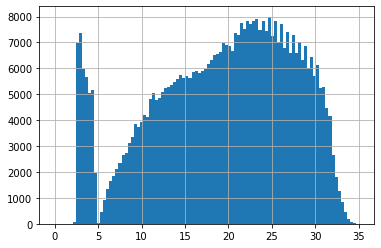

In [78]:
gam = [OnephotonEvents['Gpx'], OnephotonEvents['Gpy'], OnephotonEvents['Gpz']]
gamTheta = getTheta(gam)
gamTheta.hist(bins=np.linspace(0, 35, 101))

<AxesSubplot:>

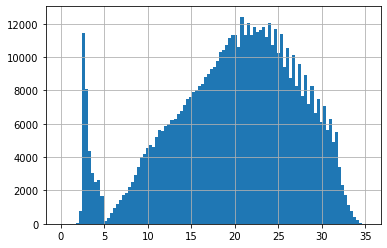

In [79]:
gam = [TwophotonEvents['Gpx'], TwophotonEvents['Gpy'], TwophotonEvents['Gpz']]
gamTheta = getTheta(gam)
gamTheta.hist(bins=np.linspace(0, 35, 101))

In [83]:
df_epgg_full = dvcsExpInb["df_epgg"]
TwophotonEventsepgg = df_epgg_full[df_epgg_full["nmg"]==2]
TwophotonEventsepgg = TwophotonEventsepgg[TwophotonEventsepgg["Pstat"]<4000]
gam = [TwophotonEventsepgg['Gpx'], TwophotonEventsepgg['Gpy'], TwophotonEventsepgg['Gpz']]
gam2 = [TwophotonEventsepgg['Gpx2'], TwophotonEventsepgg['Gpy2'], TwophotonEventsepgg['Gpz2']]

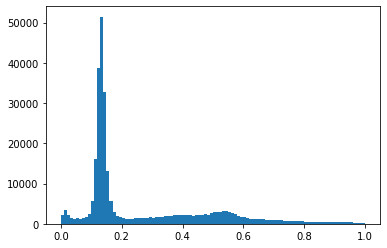

In [87]:
import matplotlib.pyplot as plt
import matplotlib
plt.hist(pi0InvMass(gam, gam2), bins =np.linspace(0, 1, 101))
plt.show()

In [93]:
len(pi0BobbyInb["dvpi0_gen"]) # dvpi0 cuts, generated

4653537

(162215, 124071)

In [133]:
df_epg = pi0BobbyInb["dvcs"]
Onephoton = df_epg[(df_epg["nmg"]==1)&((df_epg["Ge"]>2))]
Twophoton = df_epg[(df_epg["nmg"]==2)&((df_epg["Ge"]>2))]
print(len(Onephoton["event"].unique()), len(Twophoton["event"].unique()))
gam = [Onephoton["Gpx"], Onephoton["Gpy"], Onephoton["Gpz"]]
hiddengam = [Onephoton["Mpx"], Onephoton["Mpy"], Onephoton["Mpz"]]
missingenergy = Onephoton["ME_epg"]

73616 87025


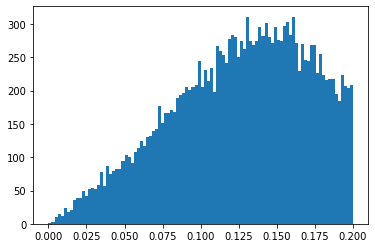

In [118]:
plt.hist(pi0InvMass(gam, hiddengam), bins =np.linspace(0, 0.2, 101))
plt.show()

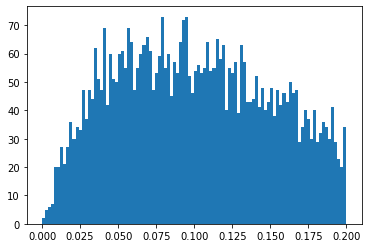

In [123]:
plt.hist(pi0InvMass(gam, hiddengam), bins =np.linspace(0, 0.2, 101))
plt.show()

In [122]:
df_epg = dvcsMCVxyzCorrInb["dvcs"]
Onephoton = df_epg[(df_epg["nmg"]==1)]
Twophoton = df_epg[(df_epg["nmg"]==2)]
print(len(Onephoton["event"].unique()), len(Twophoton["event"].unique()))
gam = [Onephoton["Gpx"], Onephoton["Gpy"], Onephoton["Gpz"]]
hiddengam = [Onephoton["Mpx"], Onephoton["Mpy"], Onephoton["Mpz"]]
missingenergy = Onephoton["ME_epg"]

14258 1311


In [128]:
len(dvcsMCVxyzCorrInb["df_epg_gen"]["event"].unique())

3469653

In [127]:
len(pi0BobbyInb["df_epg_gen"]["event"].unique())

5681870

<AxesSubplot:>

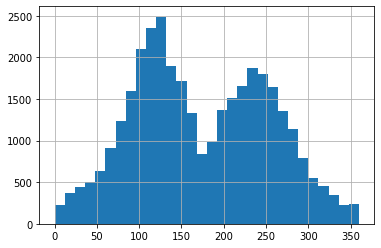

In [130]:
pi0BobbyInb["dvcs"]["phi2"].hist(bins=np.linspace(0,360,31))

<AxesSubplot:>

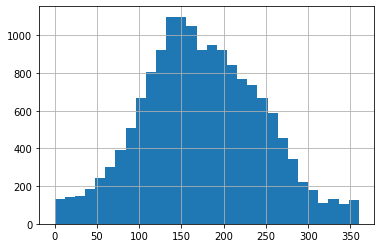

In [131]:
dvcsMCVxyzCorrInb["dvcs"]["phi2"].hist(bins=np.linspace(,360,31))

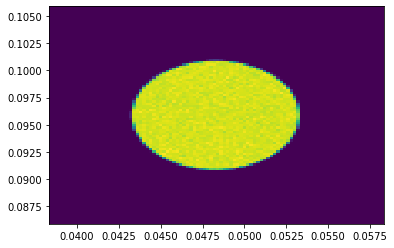

In [37]:
import matplotlib.pyplot as plt
plt.hist2d(dvcsMCVxyzCorrInb["df_epg_gen"]["Evx"], dvcsMCVxyzCorrInb["df_epg_gen"]["Evy"], bins = [np.linspace(0.0483278-0.01, 0.0483278+0.01, 101), np.linspace(0.0958866-0.01, 0.0958866+0.01, 101)])
plt.show()

## 3. looking at Andrey's simulation.

In [58]:
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))

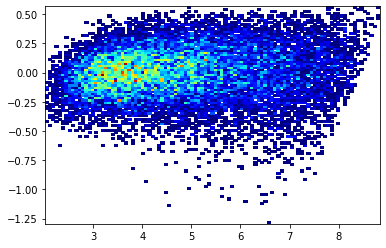

In [60]:
dvcs = dvcsMCVxyzCorrInb["dvcs"]
dvpi0 = dvcsMCVxyzCorrInb["dvpi0"]
df_MC = dvcsMCVxyzCorrInb["df_MC"]
dvcs = pd.merge(dvcs, df_MC, how="inner", on="event")
dvpi0 = pd.merge(dvpi0, df_MC, how="inner", on="event")
gam_gen = [dvcs["MCGpx"], dvcs["MCGpy"], dvcs["MCGpz"]]
dvcs["MCGtheta"] = getTheta(gam_gen)
dvcs["MCGphi"] = getPhi(gam_gen)
# (dvcs["Gphi"]-dvcs["MCGphi"]).hist(bins=np.linspace(-0.5, 0.5, 101))
plt.hist2d(dvcs["Ge"], dvcs["Ge"]-dvcs["MCGe"], cmin = 1, cmap=cmap, bins =101)
plt.show()

In [52]:
dvcs = dvcsExpInb["dvcs"]
dvpi0 = dvcsExpInb["dvpi0"]
# print(len(dvcs))
dvcsnodvpi0Exp = dvcs[~dvcs["event"].isin(dvpi0["event"])]
dvpi0anddvcsExp = dvpi0[dvpi0["event"].isin(dvcs["event"])]
# print(len(dvcsExpInb["dvcs"]))
# dvcsnodvpi0 = dvcs[~dvcs["event"].isin(dvpi0["event"])]

In [53]:
dvcs = pi0BobbyInb["dvcs"]
dvpi0 = pi0BobbyInb["dvpi0"]
df_MC = pi0BobbyInb["df_MC"]
dvcsdvpi0 = dvcs[dvcs["event"].isin(dvpi0["event"])]
dvcsnodvpi0 = dvcs[~dvcs["event"].isin(dvpi0["event"])]
dvpi0anddvcs = dvpi0[dvpi0["event"].isin(dvcs["event"])]

In [54]:
print(len(dvcsnodvpi0Exp) - len(pi0ExpInb["dvpi0"])*len(dvcsnodvpi0)/len(dvpi0))
print(len(dvcsnodvpi0Exp) - len(dvpi0anddvcsExp)*len(dvcsnodvpi0)/len(dvpi0anddvcs))

print(len(dvcsExpInb["dvcs"]), len(pi0ExpInb["dvpi0"]))
print(len(dvcsdvpi0), len(dvcsnodvpi0), len(dvpi0), len(dvcs))

69402.03245346074
80504.93422738533
159772 134561
22945 32900 76602 55845


In [55]:
dvcs = pi0MCdnpInb["dvcs"]
dvpi0 = pi0MCdnpInb["dvpi0"]
df_MC = pi0MCdnpInb["df_MC"]
dvcsdvpi0 = dvcs[dvcs["event"].isin(dvpi0["event"])]
dvcsnodvpi0 = dvcs[~dvcs["event"].isin(dvpi0["event"])]
dvpi0anddvcs = dvpi0[dvpi0["event"].isin(dvcs["event"])]

In [56]:
print(len(dvcsnodvpi0Exp) - len(pi0ExpInb["dvpi0"])*len(dvcsnodvpi0)/len(dvpi0))
print(len(dvcsnodvpi0Exp) - len(dvpi0anddvcsExp)*len(dvcsnodvpi0)/len(dvpi0anddvcs))
print(len(dvcsExpInb["dvcs"]), len(pi0ExpInb["dvpi0"]))
print(len(dvcsdvpi0), len(dvcsnodvpi0), len(dvpi0), len(dvcs)), len(dvpi0nodvcs)

69590.55670369414
78975.2214299118
159772 134561
15672 23200 54194 38872


(None, 38207)

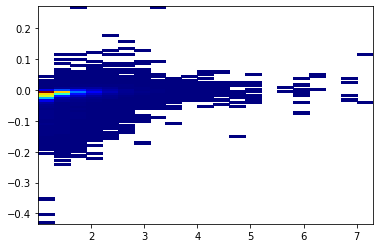

In [164]:
dvcs = pi0MCdnpInb["dvcs"]
dvpi0 = pi0MCdnpInb["dvpi0"]
df_MC = pi0MCdnpInb["df_MC"]
gam1 = df_MC[df_MC.index%2==0]
gam1 = gam1.reset_index(drop=True)
gam2 = df_MC[df_MC.index%2==1]
gam2 = gam2.reset_index(drop=True)
gam1.loc[:,"MCGpx2"] = gam2.loc[:,"MCGpx"]
gam1.loc[:,"MCGpy2"] = gam2.loc[:,"MCGpy"]
gam1.loc[:,"MCGpz2"] = gam2.loc[:,"MCGpz"]
gam1.loc[:,"MCGe2"] = gam2.loc[:,"MCGe"]
df_MC = gam1
dvcs = pd.merge(dvcs, df_MC, how="inner", on="event")
dvpi0 = pd.merge(dvpi0, df_MC, how="inner", on="event")
dvpi0copy = copy(dvpi0)
dvpi0copy.loc[:, "MCGe"] = np.where(dvpi0["MCGe"]>dvpi0["MCGe2"], dvpi0.loc[:, "MCGe"], dvpi0.loc[:, "MCGe2"])
dvpi0copy.loc[:, "MCGe2"] = np.where(dvpi0["MCGe"]>dvpi0["MCGe2"], dvpi0.loc[:, "MCGe2"], dvpi0.loc[:, "MCGe"])
dvpi0 = dvpi0copy
# print(np.sum(dvpi0["MCGe"]<dvpi0["MCGe2"]))
# plt.hist2d(dvpi0["Ge"], dvpi0["Ge"]-dvpi0["MCGe"], cmin = 1, cmap=cmap, bins =[101,np.linspace(-0.5,0.5,101)])
# plt.hist2d(dvpi0["MCGe2"], dvpi0["Ge2"]-dvpi0["MCGe2"], cmin = 1, cmap=cmap, bins =[101,np.linspace(-0.5,0.5,101)])
plt.hist2d(dvpi0["Pe"], dvpi0["Pe"]-dvpi0["MCPe"], cmin=1, cmap=cmap, bins =[21, 101])
plt.show()

<AxesSubplot:>

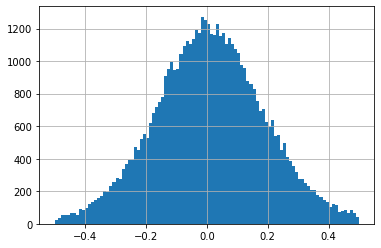

In [100]:
(dvpi0["Ge"]-dvpi0["MCGe"]).hist(bins = np.linspace(-.5, .5, 101))

<AxesSubplot:>

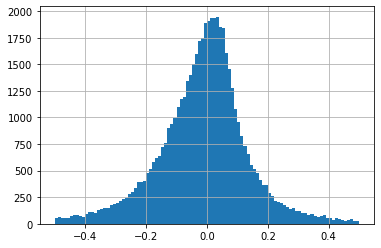

In [101]:
(dvpi0["Ge2"]-dvpi0["MCGe2"]).hist(bins = np.linspace(-.5, .5, 101))

<AxesSubplot:>

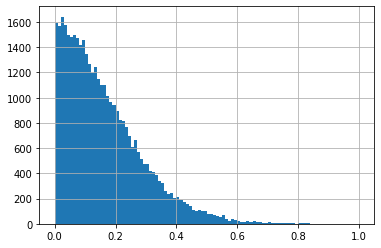

In [29]:
np.minimum(np.abs(dvcs["ME_epg"]-dvcs["MCGe"]), np.abs(dvcs["ME_epg"]-dvcs["MCGe2"])).hist(bins = np.linspace(0, 1, 101))

In [30]:
dvcsfrompi0Sim = pi0MCdnpInb["dvcs"]
dvcsfromdvcsSim = dvcsMCVxyzCorrInb["dvcs"]
dvcsfromdata = dvcsExpInb["dvcs"]

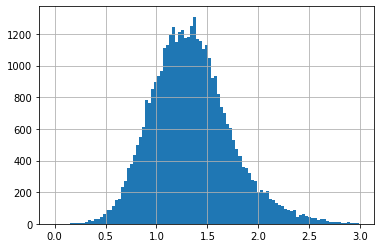

In [31]:
missing_energy = dvcsfrompi0Sim["ME_epg"]
gam = [dvcsfrompi0Sim["Gpx"], dvcsfrompi0Sim["Gpy"], dvcsfrompi0Sim["Gpz"]]
hidden_gam = [dvcsfrompi0Sim["Mpx"], dvcsfrompi0Sim["Mpy"], dvcsfrompi0Sim["Mpz"]]
hidden_gam_energy = getEnergy(hidden_gam, 0)
pi0InvMass1 = (missing_energy+dvcsfrompi0Sim["Ge"])**2-mag2(vecAdd(hidden_gam, gam))
pi0InvMass2 = (hidden_gam_energy+dvcsfrompi0Sim["Ge"])**2-mag2(vecAdd(hidden_gam, gam))
# pi0InvMass1.hist(bins=101)
# np.sqrt(pi0InvMass2).hist(bins=101)
(dvcsfrompi0Sim["MM2_eg"]).hist(bins=101)
# plt.hist2d(getTheta(gam)-getTheta(hidden_gam), bins = 101, cmap = cmap, cmin = 1)
plt.show()

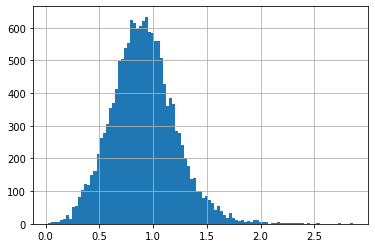

In [32]:
missing_energy = dvcsfromdvcsSim["ME_epg"]
gam = [dvcsfromdvcsSim["Gpx"], dvcsfromdvcsSim["Gpy"], dvcsfromdvcsSim["Gpz"]]
hidden_gam = [dvcsfromdvcsSim["Mpx"], dvcsfromdvcsSim["Mpy"], dvcsfromdvcsSim["Mpz"]]
hidden_gam_energy = getEnergy(hidden_gam, 0)
pi0InvMass1 = (missing_energy+dvcsfromdvcsSim["Ge"])**2-mag2(vecAdd(hidden_gam, gam))
pi0InvMass2 = (hidden_gam_energy+dvcsfromdvcsSim["Ge"])**2-mag2(vecAdd(hidden_gam, gam))
# pi0InvMass1.hist(bins=101)
# np.sqrt(pi0InvMass2).hist(bins=101)
# getTheta(hidden_gam).hist(bins=101)
# (getTheta(hidden_gam)).hist(bins=101)
(dvcsfromdvcsSim["MM2_eg"]).hist(bins=101)

# plt.hist2d(getTheta(hidden_gam), angle(gam, hidden_gam), bins = 101, cmap = cmap, cmin = 1)
plt.show()

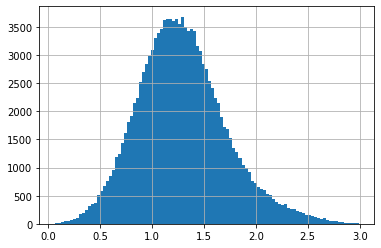

In [33]:
missing_energy = dvcsfromdata["ME_epg"]
gam = [dvcsfromdata["Gpx"], dvcsfromdata["Gpy"], dvcsfromdata["Gpz"]]
hidden_gam = [dvcsfromdata["Mpx"], dvcsfromdata["Mpy"], dvcsfromdata["Mpz"]]
hidden_gam_energy = getEnergy(hidden_gam, 0)
pi0InvMass1 = (missing_energy+dvcsfromdata["Ge"])**2-mag2(vecAdd(hidden_gam, gam))
pi0InvMass2 = (hidden_gam_energy+dvcsfromdata["Ge"])**2-mag2(vecAdd(hidden_gam, gam))
# pi0InvMass1.hist(bins=101)
# getTheta(hidden_gam).hist(bins=101)
(dvcsfromdata["MM2_eg"]).hist(bins=101)
# plt.hist2d(getTheta(hidden_gam), angle(gam, hidden_gam), bins = 101, cmap = cmap, cmin = 1)
plt.show()

<AxesSubplot:>

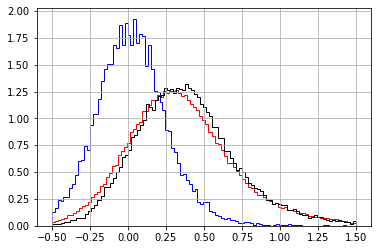

In [34]:
(dvcsfromdata["ME_epg"]).hist(bins=101, density=True, histtype='stepfilled', facecolor='none', edgecolor='r')
(dvcsfromdvcsSim["ME_epg"]).hist(bins=101,density=True, histtype='stepfilled', facecolor='none', edgecolor='b')
(dvcsfrompi0Sim["ME_epg"]).hist(bins=101,density=True, histtype='stepfilled', facecolor='none', edgecolor='k')

<AxesSubplot:>

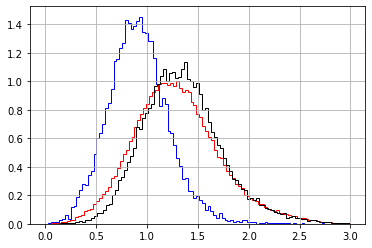

In [35]:
(dvcsfromdata["MM2_eg"]).hist(bins=101, density=True, histtype='stepfilled', facecolor='none', edgecolor='r')
(dvcsfromdvcsSim["MM2_eg"]).hist(bins=101,density=True, histtype='stepfilled', facecolor='none', edgecolor='b')
(dvcsfrompi0Sim["MM2_eg"]).hist(bins=101,density=True, histtype='stepfilled', facecolor='none', edgecolor='k')

<AxesSubplot:>

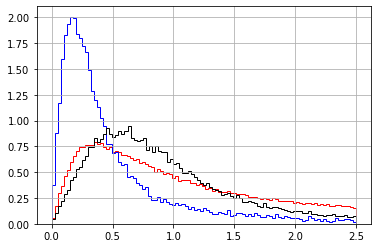

In [36]:
(dvcsfromdata["reconGam"]).hist(bins=101, density=True, histtype='stepfilled', facecolor='none', edgecolor='r')
(dvcsfromdvcsSim["reconGam"]).hist(bins=101,density=True, histtype='stepfilled', facecolor='none', edgecolor='b')
(dvcsfrompi0Sim["reconGam"]).hist(bins=101,density=True, histtype='stepfilled', facecolor='none', edgecolor='k')

<AxesSubplot:>

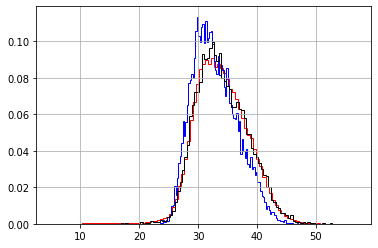

In [37]:
(dvcsfromdata["coneAngle"]).hist(bins=101, density=True, histtype='stepfilled', facecolor='none', edgecolor='r')
(dvcsfromdvcsSim["coneAngle"]).hist(bins=101,density=True, histtype='stepfilled', facecolor='none', edgecolor='b')
(dvcsfrompi0Sim["coneAngle"]).hist(bins=101,density=True, histtype='stepfilled', facecolor='none', edgecolor='k')

<AxesSubplot:>

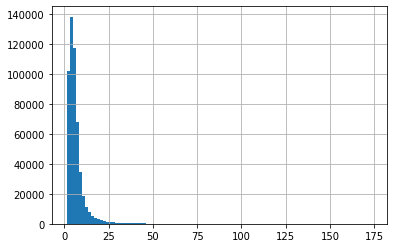

In [38]:
gam1 = [df_MC["MCGpx"], df_MC["MCGpy"], df_MC["MCGpz"]]
gam2 = [df_MC["MCGpx2"], df_MC["MCGpy2"], df_MC["MCGpz2"]]
# getTheta(gam1).hist()
# getTheta(gam2).hist()
angle(gam1, gam2).hist(bins = 101)

In [44]:
dvpi0_data = pi0ExpInb["dvpi0"]

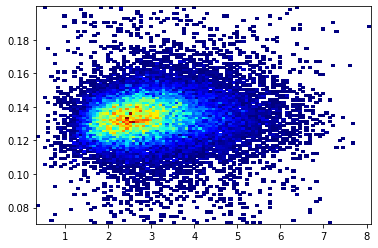

In [59]:
sec=6
plt.hist2d(dvpi0_data.loc[dvpi0_data["Gsector"]==sec,"Ge"], dvpi0_data.loc[dvpi0_data["Gsector"]==sec,"Mpi0"], bins = 101, cmap = cmap, cmin = 1)
plt.show()

<AxesSubplot:>

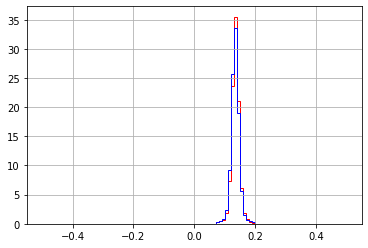

In [118]:
pi0MCdnpInb["dvpi0"].Mpi0.hist(bins =np.linspace(-0.5,0.5,101), density=True,  histtype='stepfilled', facecolor='none', edgecolor='r')
pi0ExpInb["dvpi0"].Mpi0.hist(bins =np.linspace(-0.5, 0.5,101), density=True,  histtype='stepfilled', facecolor='none', edgecolor='b')

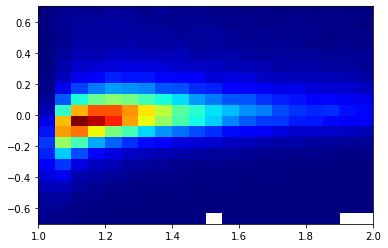

In [159]:
plt.hist2d(pi0ExpInb["dvpi0"].Pe, pi0ExpInb["dvpi0"].MM2_ep, bins = [np.linspace(1, 2, 21), np.linspace(-0.7, 0.7, 21)], cmin = 1, cmap = cmap)
plt.show()